## Minería de Texto

![title](https://www.kdnuggets.com/wp-content/uploads/videolectures-most-popular-text-mining-words.jpg)

### La minería de texto es el proceso de obtener  información de alta calidad a partir del texto.

### ¿Qué clase de información?

#### -Palabras Clave: Soplan los vientos, *Leonel 2020*. 

#### -Sentimiento: El Iphone X es un disparate.

#### -Agrupaciones: Todos esos tweets son bien parecidos.

#### Y muchos más.

![title](https://cdn1.iconfinder.com/data/icons/logotypes/32/square-twitter-256.png)

### El texto es el dato más abundante, ya que es generado cada milisegundo en un sitio que todos visitamos, la internet. 

![title](http://www.telegraph.co.uk/content/dam/technology/2016/02/12/social-media-butto_3218906b_trans_NvBQzQNjv4BqpJliwavx4coWFCaEkEsb3kvxIt-lGGWCWqwLa_RXJU8.jpg?imwidth=450)

#### Tenemos datos infinitos con los que jugar. Pero como lo conseguimos?

#### Los textos son datos NO Estructurados.

![title](https://www.laserfiche.com/content/uploads/2015/05/unstructured_data.png)

#### Los metodos convencionales para analizar datos no funcionan aquí. ¿Qué Procede?

### Proceso de Minería de Texto. 

![title](http://cdn2.hubspot.net/hub/64283/file-15460926-png/images/text-mining-general-process-resized-600.png)

### Caso de Uso, minería de texto de Periodicos Dominicanos

![title](http://eldia.com.do/wp-content/uploads/2013/11/portadas.jpg) 



### Primer Paso: Obtener los datos

Como los sitios web de los periodicos no son muy amigables para navegar hacia al pasado, y también tienen estructuras de portadas diferentes, recurrimos a un vínculo en común: *Facebook*.

![title](https://i.imgur.com/jtPHtKq.png)

In [1]:
def testFacebookPageFeedData(page_id, access_token):
    
    # construct the URL string
    base = "https://graph.facebook.com/v2.10"
    node = "/" + page_id + "/feed" # changed
    parameters = "/?fields=message,created_time,reactions.type(LOVE).limit(0).summary(total_count).as(reactions_love),reactions.type(WOW).limit(0).summary(total_count).as(reactions_wow),reactions.type(HAHA).limit(0).summary(total_count).as(reactions_haha),reactions.type(ANGRY).limit(0).summary(total_count).as(reactions_angry),reactions.type(SAD).limit(0).summary(total_count).as(reactions_sad),reactions.type(LIKE).limit(0).summary(total_count).as(reactions_like)&limit={}&access_token={}".format(100, access_token) # changed
    url = base + node + parameters
    
    # retrieve data
    data = json.loads(request_until_succeed(url))
    
    return data

In [2]:
def Get_News(limit = 10):
    result = {}
    nex = None
    for  i in range(limit):
        range_dates = []
        range_messages = []
        range_ids=  []
        if i == 0:
            data = testFacebookPageFeedData(page_id,access_token)
            nex = data['paging']['next']
            for d in data['data']:
                range_dates.append(d['created_time'])
                range_messages.append(d['message'])
                range_ids.append(d['id'])
            result['dates'] = range_dates
            result['messages'] = range_messages
            result['angry'] = range_angry
            result['id'] = range_ids
        
        else:
            data = json.loads(request_until_succeed(nex))
            try:
                nex = data['paging']['next']
            except:
                break
            for d in data['data']:
                try:
                    range_messages.append(d['message'])
                    range_dates.append(d['created_time'])
                    range_ids.append(d['id'])
                    
                except:
                    print(d)
            result['dates'].extend(range_dates)
            result['messages'].extend(range_messages)
            result['id'].extend(range_ids)
            
    
    result_df = pd.DataFrame(result)
    return result_df

In [3]:
import pandas as pd
pd.set_option('chained_assignment',None)
diario_libre_fb = pd.read_csv('diario_libre_fb.csv',encoding='latin1')

In [6]:
def get_url(url):
    urls = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', url)
    try:
        result =   urls[0]
    except:
        result = 'Not found'
    return result

In [5]:
diario_libre_fb.head()

,angry,dates,haha,like,love,messages,sad,wow,url
0,1,2017-10-07T15:51:32+0000,1,457,1,Fallece paracaidista dominicano tras accidente...,484,78,https://buff.ly/2fTOrZK
1,0,2017-10-07T15:42:27+0000,2,33,0,Falleció en la madrugada jurista Domingo Porfi...,14,9,https://buff.ly/2y2J8zu
2,0,2017-10-07T15:35:00+0000,0,74,1,Taiwán observa los contactos de China Popular ...,0,3,http://ht.ly/jpuA30fIal5
3,0,2017-10-07T15:00:17+0000,0,5,1,¡Hoy es sábado de #EstilosRD! ¿Ya tienes la tu...,0,0,https://buff.ly/2xYWIWO
4,0,2017-10-07T14:45:01+0000,0,35,0,"Turquía, tras mercado de acero República Domin...",0,0,http://ht.ly/LAoE30fIaQd


### Segundo paso, obtener el contenido. 

De los datos de Facebok, solo tenemos los titulos  y los urls. Necesitamos los **articulos**. Para esto, necesitamos acceder a los urls y **extraer** los datos de la página web. Esto es **Web Scraping**. 

![title](http://webdata-scraping.com/media/2015/01/Web-Scraping-Process.png)

#### Nada que ver aquí, Pedro presenta el Web Scraping en R.

### Tercer paso: Analizar el texto

#### Ya con el texto guardado y estructurado, solo falta *analizarlo*. 

![title](http://bennettparten.com/TheHistoryReviewBlog/wp-content/uploads/2016/04/Tackling-the-root-causes-of-poor-experience-via-text-analysis-770x289.jpg)

In [17]:
import os
path = os.getcwd()
csv_files =[]
for file in os.listdir(path):
    if file.endswith(".csv") and 'diario_libre_fb' not in file:
         csv_files.append(os.path.join(path, file))

In [18]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (8, 4) # Size of plot
rcParams['figure.dpi'] = 100 #Dots per inch of plot
rcParams['lines.linewidth'] = 2 # Width of lines of the plot
rcParams['axes.facecolor'] = 'white' #Color of the axes
rcParams['font.size'] = 12 # Size of the text.
rcParams['patch.edgecolor'] = 'white' #Patch edge color.
rcParams['font.family'] = 'StixGeneral' #Font of the plot text.

In [19]:
diarios = ['Diario Libre','El Dia','Hoy','Listin Diario','El Nacional']
noticias_df_all = None
for i,periodico in enumerate(csv_files):
    
    noticias_df = pd.read_csv(csv_files[0],encoding = 'latin1').iloc[:,1:]
    noticias_df['Diario'] = diarios[i]
    if noticias_df_all is None:
        noticias_df_all = noticias_df
    else:
        noticias_df_all = noticias_df_all.append(noticias_df)

noticias_df_all.reset_index(drop = True,inplace = True)
noticias_df_all.describe()       

,contenidos,fechas,titulos,url,Diario
count,7685,10075,11285,11585,11585
unique,1470,1201,2133,2269,5
top,"LOJA, Ecuador. Tiene unos 10 años, mide alred...",2013-06-01 12:00:00,Periódico líder de la República Dominicana,http://www.diariolibre.com/fotos/,Listin Diario
freq,155,125,150,90,2317


In [20]:
noticias_df_completas = noticias_df_all.loc[pd.notnull(noticias_df_all.contenidos)]
noticias_df_completas.shape

(7685, 5)

### Ya casi podemos comenzar a analizar. Vamos a utilizar el modelo de bolsa de palabras (bag of words). En este modelo contamos la ocurrencia de cada palabra en cada texto.   

![title](http://slideplayer.com/slide/7073400/24/images/15/The+Bag+of+Words+Representation.jpg)

#### Pero para lograr esto de la manera más efectiva hay que limpiar el texto:

- Convertir a minuscula: Santiago -> santiago

- Eliminar caracteres no alfabeticos -> No pararon. -> No pararon

- Eliminar tildes -> República Dominicana -> Republica Dominicana

- Eliminar palabras sin ningun valor análitico -> Falleció la mañana de este sábado -> Falleció mañana sabado

#### Para facilitar esto, vamos a utilizar la librería de texto Natural Language Toolkit o NLTK. Contiene un número inmenso de funcionalidades como :

- Corpus de texto

- Conversión de oraciones a las partes de texto (POS).

- Tokenización de palabras y oraciones.

- Y mucho más...

![title](https://static1.squarespace.com/static/538cea80e4b00f1fad490c1b/54668a77e4b00fb778d22a34/54668d8ae4b00fb778d2859c/1416007413413/NLTK.png)

In [40]:
pd.options.mode.chained_assignment = None 

In [21]:
import nltk
spanish_stops = set(nltk.corpus.stopwords.words('Spanish'))
list(spanish_stops)[:10]

['estoy',
 'tendrán',
 'tenidas',
 'estuviésemos',
 'hubieses',
 'estaría',
 'estaríais',
 'fuese',
 'los',
 'tienes']

In [38]:
import unicodedata
import re
def strip_accents(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
                  if unicodedata.category(c) != 'Mn')


def Clean_Text(text):
    
    words = text.lower().split()
    removed_stops = [strip_accents(w) for w in words if  w not in spanish_stops and len(w)!=1]
    stops_together = " ".join(removed_stops)
    letters_only = re.sub("[^a-zA-Z]"," ", stops_together)
    
    
    return letters_only

In [41]:
noticias_df_completas['contenido limpio'] = noticias_df_completas.contenidos.apply(Clean_Text)
noticias_df_completas[['contenidos','contenido limpio']].head()

,contenidos,contenido limpio
0,SANTO DOMINGO. Falleció la mañana de este sába...,santo domingo fallecio manana sabado paracaid...
1,SANTO DOMINGO. El destacado abogado Domingo Po...,santo domingo destacado abogado domingo porfi...
2,TAIWÁN. El gobierno y el pueblo taiwanés están...,taiwan gobierno pueblo taiwanes atentos acerc...
4,SANTO DOMINGO. Una delegación comercial de Tur...,santo domingo delegacion comercial turquia en...
5,SANTIAGO. El Ayuntamiento de Santiago colocó u...,santiago ayuntamiento santiago coloco valla p...


#### Una alternativa para estandarizar las palabras es *stemming*. Esto devuelve a una palabra a la raíz de su familia

In [42]:
from nltk.stem.snowball import SnowballStemmer
spanish_stemmer = SnowballStemmer("spanish")
print(spanish_stemmer.stem("corriendo"))
print(spanish_stemmer.stem("correr"))

corr
corr


In [43]:
def stem_text(text):
    stemmed_text = [spanish_stemmer.stem(word) for word in text.split()]
    return " ".join(stemmed_text)

noticias_df_completas['contenido stemmed'] = noticias_df_completas['contenido limpio'].apply(stem_text)
noticias_df_completas.head()

,contenidos,fechas,titulos,url,Diario,contenido limpio,contenido stemmed
0,SANTO DOMINGO. Falleció la mañana de este sába...,2017-10-07 11:05:00,Fallece paracaidista dominicano tras accidente...,https://buff.ly/2fTOrZK,Diario Libre,santo domingo fallecio manana sabado paracaid...,sant doming falleci manan sab paracaid luis lu...
1,SANTO DOMINGO. El destacado abogado Domingo Po...,2017-10-07 11:31:00,Falleció en la madrugada jurista Domingo Porfi...,https://buff.ly/2y2J8zu,Diario Libre,santo domingo destacado abogado domingo porfi...,sant doming destac abog doming porfiri roj nin...
2,TAIWÁN. El gobierno y el pueblo taiwanés están...,2017-10-07 12:00:00,Taiwán observa los contactos de China Popular ...,http://ht.ly/jpuA30fIal5,Diario Libre,taiwan gobierno pueblo taiwanes atentos acerc...,taiw gobiern puebl taiwan atent acerc ultim me...
4,SANTO DOMINGO. Una delegación comercial de Tur...,2017-10-07 12:00:00,"Turquía, tras mercado de acero República Domin...",http://ht.ly/LAoE30fIaQd,Diario Libre,santo domingo delegacion comercial turquia en...,sant doming delegacion comercial turqui encuen...
5,SANTIAGO. El Ayuntamiento de Santiago colocó u...,2017-10-07 09:49:00,Ayuntamiento de Santiago colocará los nombres ...,http://ht.ly/H0sl30fIbpU,Diario Libre,santiago ayuntamiento santiago coloco valla p...,santiag ayunt santiag coloc vall publicitari i...


### Cuenta de Palabras

In [56]:
import itertools
def Create_ngrams(all_text,number=1):
    result = {}
    for text in all_text:
        text = [w for w in text.split() if len(w) != 1]
        for comb in list(itertools.combinations(text, number)):
            found = False
            temp_dict = {}
            i =0
            while not found and i < len(comb):
                if comb[i] not in temp_dict:
                    temp_dict[comb[i]] = "Found"
                else:
                    found = True
                i += 1
            if not found:
                if comb not in result:
                    result[comb]= 1
                else:
                    result[comb]+=1
    df = pd.DataFrame({ str(number) + "-Combinations": list(result.keys()),"Count":list(result.values())})
    return df.sort_values(by="Count",ascending=False)

In [57]:
one_ngrams = Create_ngrams(noticias_df_completas['contenido limpio'])
one_ngrams.head()

,1-Combinations,Count
1,"(domingo,)",6690
396,"(anos,)",5755
0,"(santo,)",5695
196,"(pais,)",5380
402,"(dijo,)",5375


### Para verlo de manera más facil para los ojos

In [51]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (8, 4) # Size of plot
rcParams['figure.dpi'] = 100 #Dots per inch of plot
rcParams['lines.linewidth'] = 2 # Width of lines of the plot
rcParams['axes.facecolor'] = 'white' #Color of the axes
rcParams['font.size'] = 12 # Size of the text.
rcParams['patch.edgecolor'] = 'white' #Patch edge color.
rcParams['font.family'] = 'StixGeneral' #Font of the plot text.

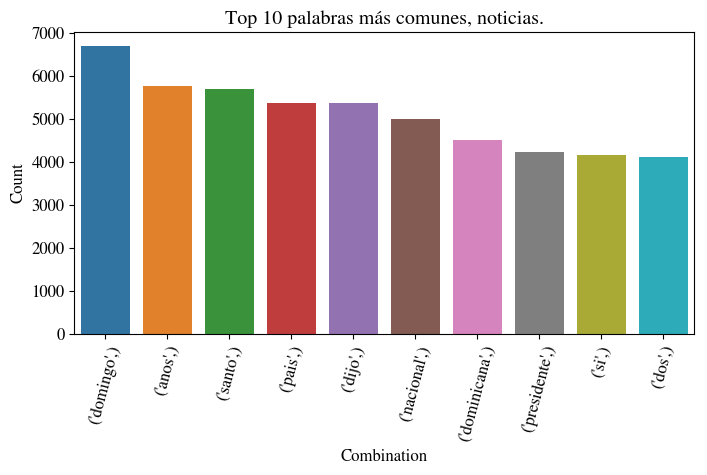

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
def Plot_nCombination(comb_df,n,title):
    sns.barplot(x=str(n) + "-Combinations",y = "Count",data = comb_df.head(10))
    plt.title(title)
    plt.xlabel("Combination")
    plt.ylabel("Count")
    plt.xticks(rotation = "75")
    plt.show()
    
Plot_nCombination(one_ngrams,1,"Top 10 palabras más comunes, noticias.")

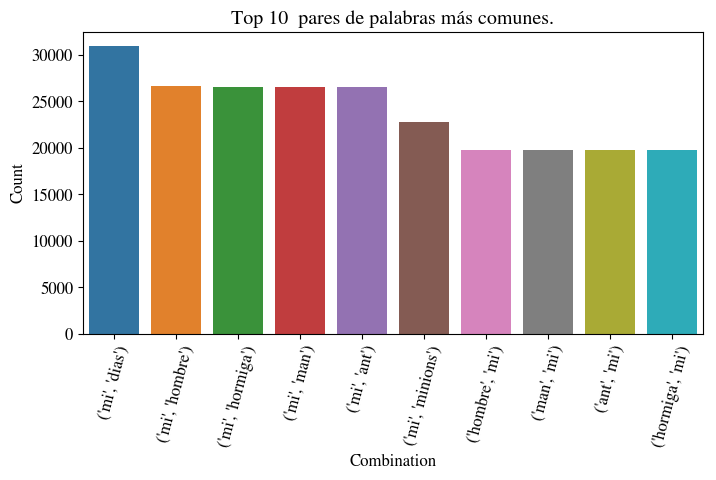

In [58]:
two_ngrams = Create_ngrams(noticias_df_completas['contenido limpio'],2)
Plot_nCombination(two_ngrams,2,"Top 10  pares de palabras más comunes.")

#### Un metodo muy util para medir la importancia de las palabras es TF-IDF. 

![title](https://d1avok0lzls2w.cloudfront.net/uploads/blog/5445d032e97981.23456174.jpg)

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
def Calculate_tfidf(text):
    corpus = text
    vectorizer = TfidfVectorizer( min_df = 0.025, max_df = 0.25)
    vector_weights = vectorizer.fit_transform(corpus)
    weights= list(np.asarray(vector_weights.mean(axis=0)).ravel())
    df = pd.DataFrame({"Word":vectorizer.get_feature_names(),"Score":weights})
    df = df.sort_values(by = "Score" ,ascending = False)
    return df,vector_weights.toarray()


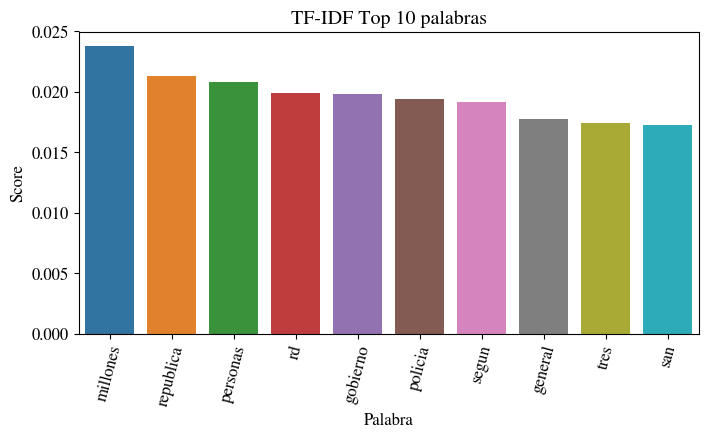

In [61]:
def Plot_Score(data,title):
    sns.barplot(x="Word",y = "Score",data = data.head(10))
    plt.title(title)
    plt.xlabel("Palabra")
    plt.ylabel("Score")
    plt.xticks(rotation = "75")
    plt.show()
    

Text_TfIdf,Text_Vector = Calculate_tfidf(noticias_df_completas['contenido limpio'])
Plot_Score(Text_TfIdf,"TF-IDF Top 10 palabras")

### Word Clouds

#### Los word clouds o nubes de palabras nos ayudan a visualizar el texto de manera más intuitiva. Las palabras más grandes son las más frecuentes.

![title](https://wordart.com/static/img/word_cloud.png)

In [62]:
noticias_df_completas = noticias_df_completas.loc[pd.notnull(noticias_df_completas.fechas)]
noticias_df_completas.fechas = pd.to_datetime(noticias_df_completas.fechas)
noticias_df_completas['Mes'] = noticias_df_completas.fechas.dt.month
noticias_df_completas['Año'] = noticias_df_completas.fechas.dt.year
noticias_df_completas.head()

,contenidos,fechas,titulos,url,Diario,contenido limpio,contenido stemmed,Mes,Año
0,SANTO DOMINGO. Falleció la mañana de este sába...,2017-10-07 11:05:00,Fallece paracaidista dominicano tras accidente...,https://buff.ly/2fTOrZK,Diario Libre,santo domingo fallecio manana sabado paracaid...,sant doming falleci manan sab paracaid luis lu...,10,2017
1,SANTO DOMINGO. El destacado abogado Domingo Po...,2017-10-07 11:31:00,Falleció en la madrugada jurista Domingo Porfi...,https://buff.ly/2y2J8zu,Diario Libre,santo domingo destacado abogado domingo porfi...,sant doming destac abog doming porfiri roj nin...,10,2017
2,TAIWÁN. El gobierno y el pueblo taiwanés están...,2017-10-07 12:00:00,Taiwán observa los contactos de China Popular ...,http://ht.ly/jpuA30fIal5,Diario Libre,taiwan gobierno pueblo taiwanes atentos acerc...,taiw gobiern puebl taiwan atent acerc ultim me...,10,2017
4,SANTO DOMINGO. Una delegación comercial de Tur...,2017-10-07 12:00:00,"Turquía, tras mercado de acero República Domin...",http://ht.ly/LAoE30fIaQd,Diario Libre,santo domingo delegacion comercial turquia en...,sant doming delegacion comercial turqui encuen...,10,2017
5,SANTIAGO. El Ayuntamiento de Santiago colocó u...,2017-10-07 09:49:00,Ayuntamiento de Santiago colocará los nombres ...,http://ht.ly/H0sl30fIbpU,Diario Libre,santiago ayuntamiento santiago coloco valla p...,santiag ayunt santiag coloc vall publicitari i...,10,2017


In [63]:
from wordcloud import WordCloud
rcParams['figure.dpi'] = 600
def crear_wordcloud_mes_anio(data,mes,anio):
    data = data.loc[(data.Mes == mes) & (data.Año == anio)]
    print("Existen {} articulos en los datos para el mes {} del año {}.".format(data.shape[0],mes,anio))
    wordcloud = WordCloud(background_color='white',max_words=200,
                          max_font_size=40,random_state=42).generate(str(data['contenido limpio']))
    
    fig = plt.figure(1)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

Existen 320 articulos en los datos para el mes 9 del año 2017.


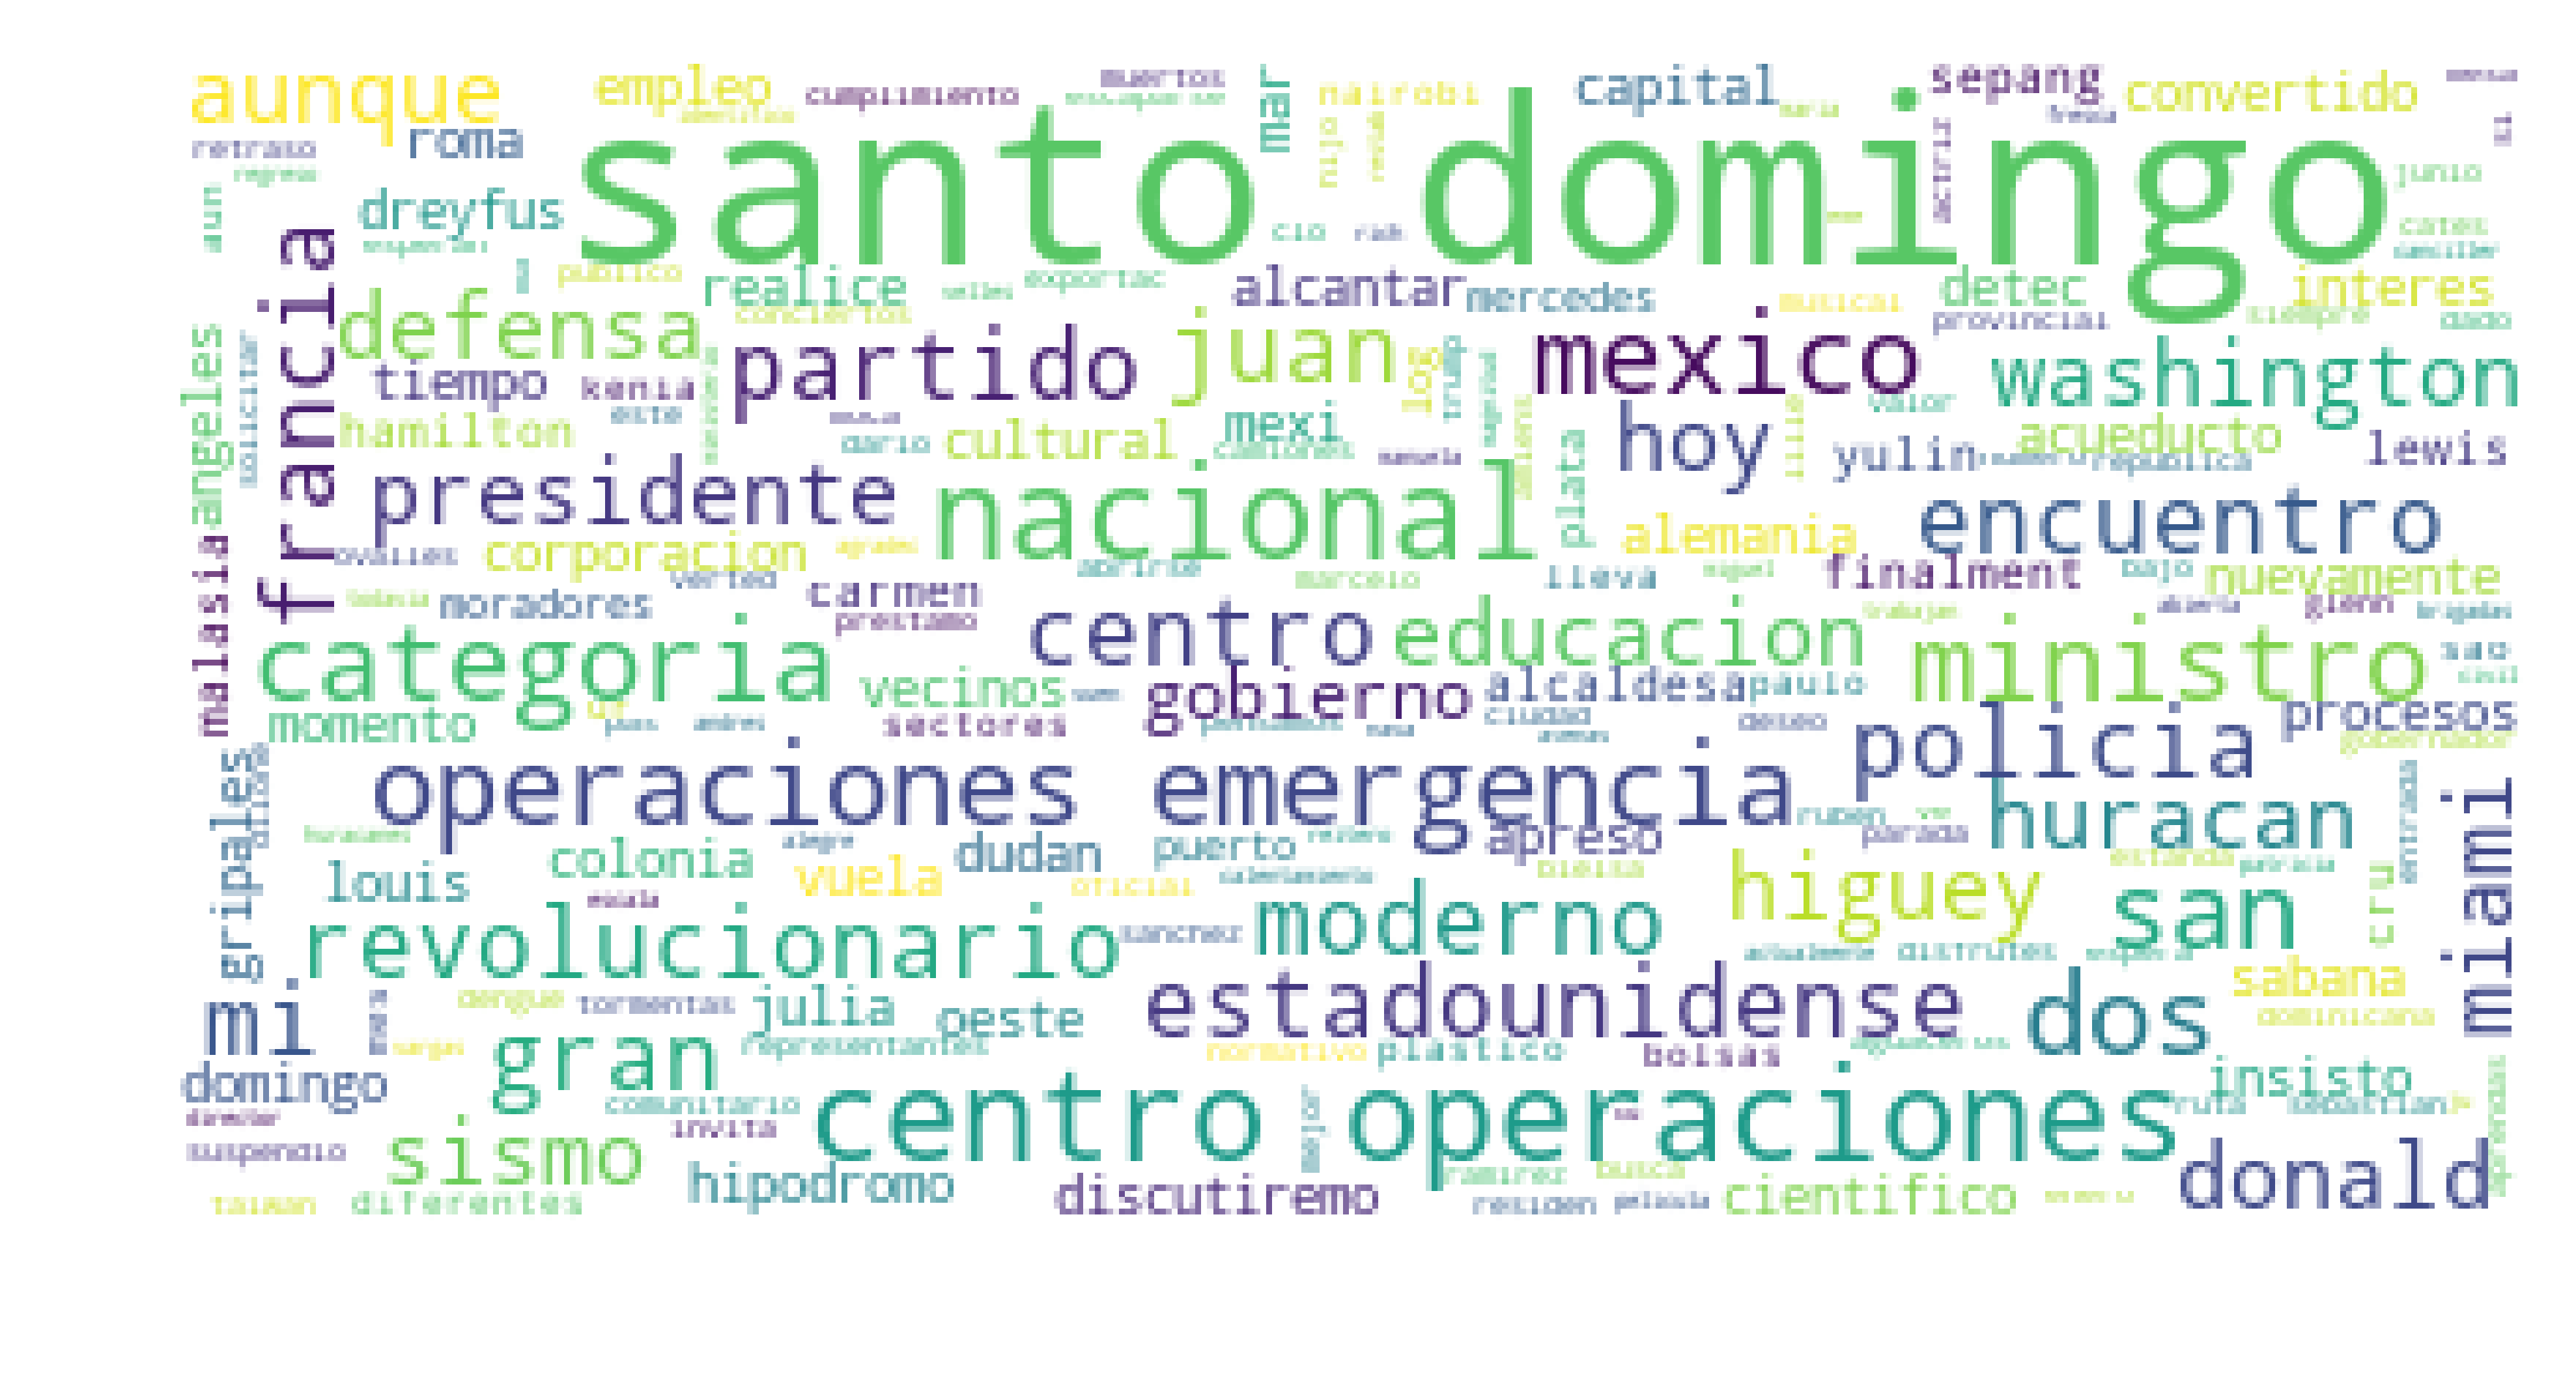

In [65]:
crear_wordcloud_mes_anio(noticias_df_completas,9,2017)